This is an Exploratory data analysis project. The dataset is obtained from Kaggle. 

Why has this analysis been implemented?

Flight delay is one of the most common but an unpleasant experience that people dread to have. Every year, a lot of flights get delayed which involves some cost both for the airline and the passenger in different ways. The passenger’s time and money get affected and at the same time, the airline’s reputation is at stake. Delay is treated as one of the most remembered performance indicators of the airline. There could be some reasons which are inevitable such as weather conditions, air trafficking or any unforeseen event; but there also could be some reasons which can be dealt with by improving the process. Therefore, statistics of the flight delays becomes crucial factor in understanding the flight’s performance.
This study presents the analysis driven from flight delay data for the city of Miami from the United States for the year 2017. This study analyses the variety of factors responsible for and associated with flight delays for different airlines.

In [2]:

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 59 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (190 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144328 files and directories currently installed.)
Pre

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
from mpl_toolkits.basemap import Basemap
from collections import OrderedDict
pd.options.display.float_format = '{:.0f}'.format

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [53]:
flights = pd.read_csv("/content/drive/My Drive/Airline Delay Analysis/flights.csv")
airports = pd.read_csv("/content/drive/My Drive/Airline Delay Analysis/airports.csv")
airlines = pd.read_csv("/content/drive/My Drive/Airline Delay Analysis/airlines.csv")
airlines = airlines.sort_values(by = ['IATA_CODE'])
flights.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354,-11,21,15,205,194,169,1448,404,4,430,408,-22,0,0,NaN,nan,nan,nan,nan,nan
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2,-8,12,14,280,279,263,2330,737,4,750,741,-9,0,0,NaN,nan,nan,nan,nan,nan
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18,-2,16,34,286,293,266,2296,800,11,806,811,5,0,0,NaN,nan,nan,nan,nan,nan
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15,-5,15,30,285,281,258,2342,748,8,805,756,-9,0,0,NaN,nan,nan,nan,nan,nan
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24,-1,11,35,235,215,199,1448,254,5,320,259,-21,0,0,NaN,nan,nan,nan,nan,nan


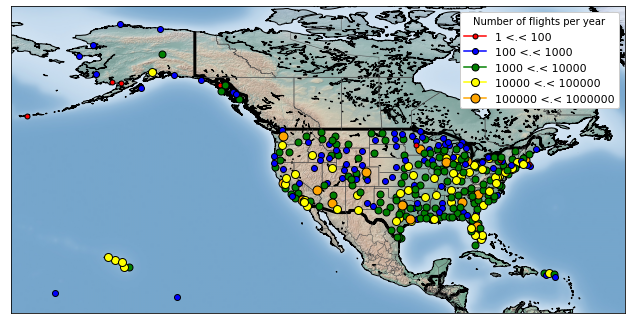

In [17]:
airport_flights_count = flights['ORIGIN_AIRPORT'].value_counts()

plt.figure(figsize=(11, 11))
colors = ['Red','Blue','Green','Yellow', 'Orange','Purple']
size_limits = [1,100,1000,10000,100000,1000000]
labels = []
for i in range(len(size_limits)-1):
  labels.append("{} <.< {}". format(size_limits[i], size_limits[i+1]))

map = Basemap(resolution = 'i', llcrnrlon = -180, urcrnrlon=-50, llcrnrlat=10, 
               urcrnrlat=75, lat_0 = 0, lon_0 = 0)
map.shadedrelief()
map.drawcoastlines()
map.drawcountries(linewidth = 3)
map.drawstates(color='0.3')

for index, (code, y, x) in airports[['IATA_CODE', 'LATITUDE','LONGITUDE']].iterrows():
  x, y= map(x,y)
  isize = [i for i, val in enumerate(size_limits) if val<airport_flights_count[code]]
  ind = isize[-1]
  map.plot(x, y, marker = 'o', markersize = ind+5, markeredgewidth = 1, color = colors[ind],
           markeredgecolor = 'k', label = labels[ind])
  
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
key_order = ('1 <.< 100', '100 <.< 1000', '1000 <.< 10000',
             '10000 <.< 100000', '100000 <.< 1000000')
new_label = OrderedDict()
for key in key_order:
    new_label[key] = by_label[key]
plt.legend(new_label.values(), new_label.keys(), loc = 1, prop= {'size':11},
           title='Number of flights per year', frameon = True, framealpha = 1)
plt.show()

In [54]:
flights['DATE']= pd.to_datetime(flights.YEAR*10000+flights.MONTH*100+flights.DAY, format = "%Y%m%d")
flights.drop(columns = ["YEAR", "DAY", "FLIGHT_NUMBER", "TAXI_IN", "TAIL_NUMBER","TAXI_OUT",
                        "WHEELS_OFF",'WHEELS_ON', 'SCHEDULED_TIME', "ELAPSED_TIME","AIR_TIME","DISTANCE"])

flights = flights[['MONTH','DAY_OF_WEEK','AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT',
                   'DEPARTURE_DELAY','ARRIVAL_DELAY','SCHEDULED_DEPARTURE','DEPARTURE_TIME',
                   'SCHEDULED_ARRIVAL', 'CANCELLED', 'DIVERTED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
                   'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY','DATE']]

for dataset in flights:
    flights.loc[flights['ARRIVAL_DELAY'] <= 15, 'Status'] = 0
    flights.loc[flights['ARRIVAL_DELAY'] >= 15, 'Status'] = 1
    flights.loc[flights['ARRIVAL_DELAY'] >= 60, 'Status'] = 2
    flights.loc[flights['DEPARTURE_DELAY'] <= 15, 'Status'] = 3
    flights.loc[flights['DEPARTURE_DELAY'] >= 15, 'Status'] = 4
    flights.loc[flights['DEPARTURE_DELAY'] >= 60, 'Status'] = 5
    flights.loc[flights['DIVERTED'] == 1, 'Status'] = 6
    flights.loc[flights['CANCELLED'] == 1, 'Status'] =7
    
    
#Cancellation cause
flights.loc[flights["CANCELLATION_REASON"] =="A", 'CancellationCode'] = "0"
flights.loc[flights["CANCELLATION_REASON"] =="B", 'CancellationCode'] = "1"
flights.loc[flights["CANCELLATION_REASON"] =="C", 'CancellationCode'] = "2"


In [4]:
missing_df = flights.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variable', 'missing values']
missing_df['filling factor (%)']=(flights.shape[0]-missing_df['missing values'])/flights.shape[0]*100
missing_df.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,CANCELLATION_REASON,5729195,2
1,LATE_AIRCRAFT_DELAY,4755640,18
2,AIRLINE_DELAY,4755640,18
3,SECURITY_DELAY,4755640,18
4,AIR_SYSTEM_DELAY,4755640,18
5,WEATHER_DELAY,4755640,18
6,ARRIVAL_DELAY,105071,98
7,DEPARTURE_DELAY,86153,99
8,DEPARTURE_TIME,86153,99
9,MONTH,0,100


<BarContainer object of 2 artists>

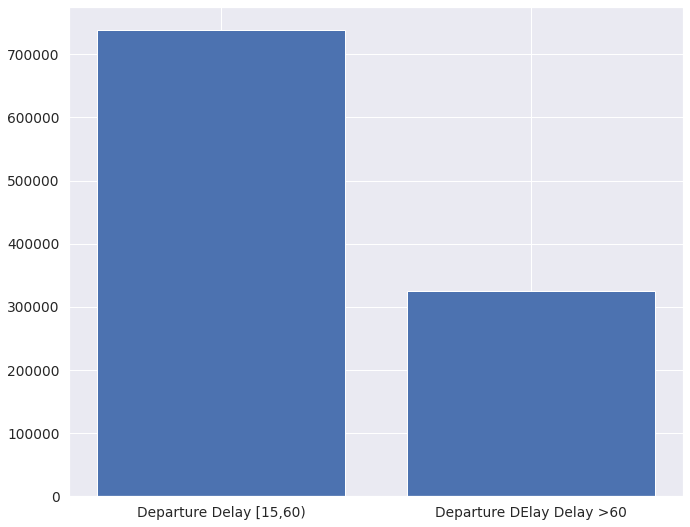

In [69]:
departuredelay_flights = flights[(flights.Status>=4) & (flights.Status<6)]
height = ['Departure Delay [15,60)','Departure DElay Delay >60']
plt.figure(figsize = (11,9))
plt.bar(height, amount_delayed['MONTH'])


Text(0.5, 1.0, 'Avg Departure Delay per Month')

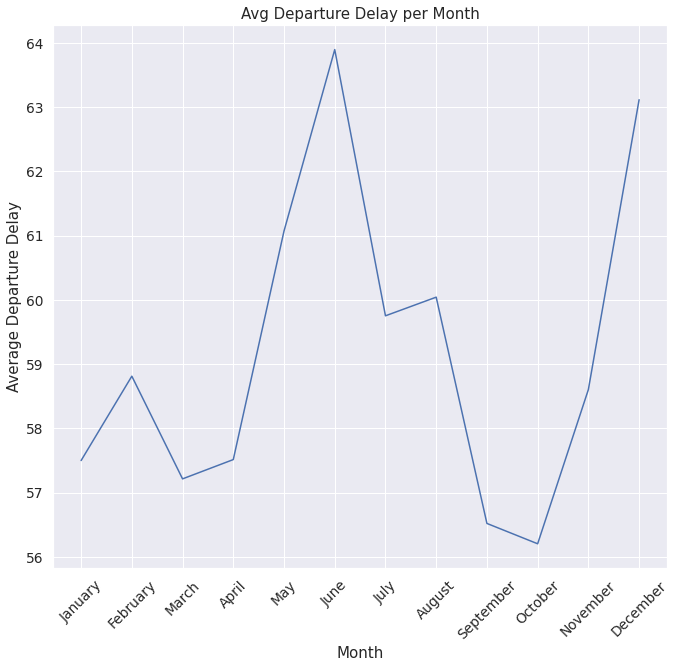

In [70]:
departure_delay = departuredelay_flights.groupby('MONTH')['DEPARTURE_DELAY'].mean()
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(11,10))
plt.plot(months,departure_delay)
plt.ylabel('Average Departure Delay')
plt.xlabel('Month')
plt.xticks(rotation=45)

plt.title("Avg Departure Delay per Month")

Text(0.5, 0, 'Airline')

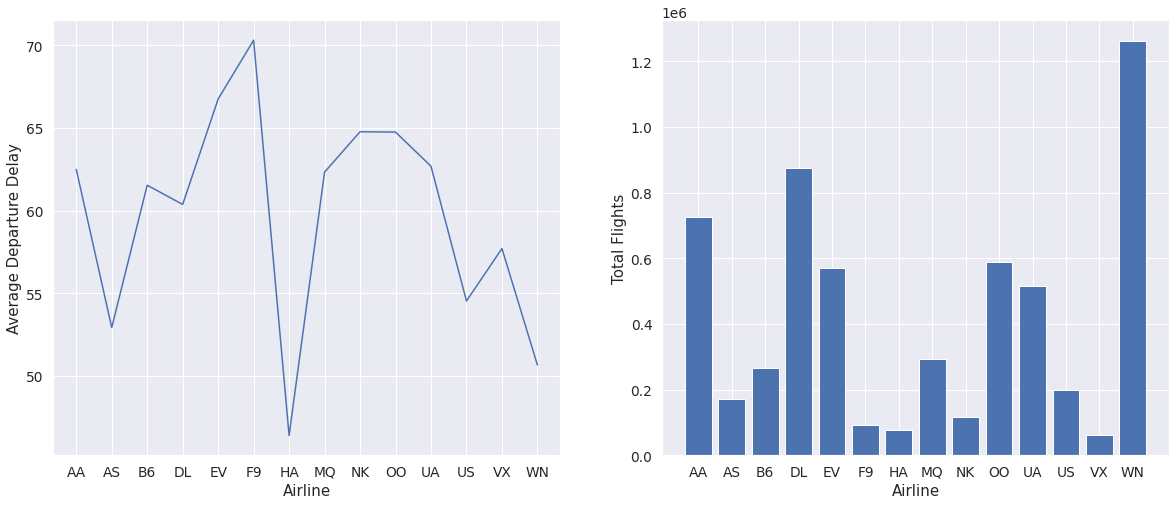

In [68]:

departure_company = departuredelay_flights.groupby("AIRLINE").mean()
delay_company = departure_company.DEPARTURE_DELAY
names=airlines.IATA_CODE
f,ax = plt.subplots(1,2, figsize=(20,8))
ax[0].plot(names,delay_company)
ax[0].set_ylabel('Average Departure Delay')
ax[0].set_xlabel('Airline')

totalflights_airlines = flights.groupby('AIRLINE').count()
values = totalflights_airlines['MONTH']
ax[1].bar(names,values)
ax[1].set_ylabel("Total Flights")
ax[1].set_xlabel('Airline')


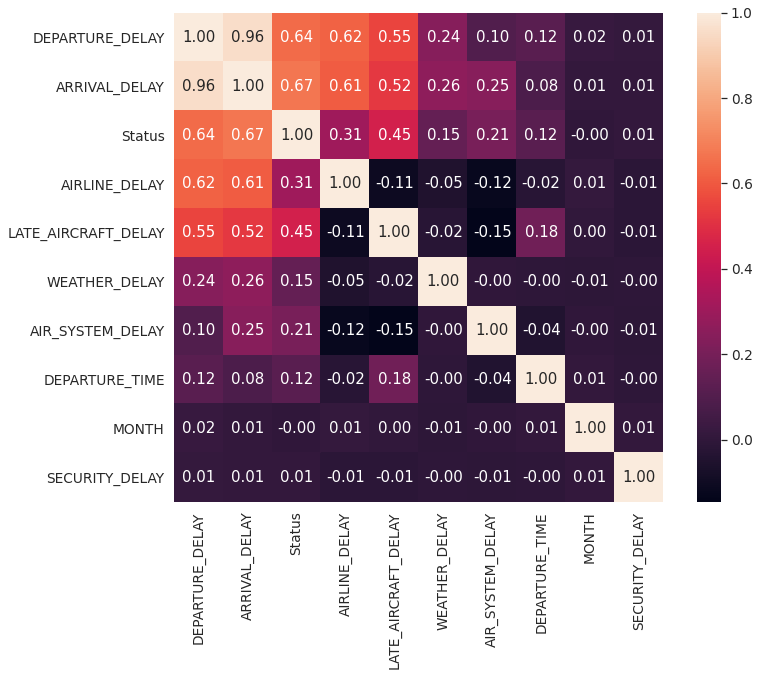

In [72]:
delcorrmat = departuredelay_flights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'DEPARTURE_DELAY')['DEPARTURE_DELAY'].index
cm = np.corrcoef(delayed_flights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


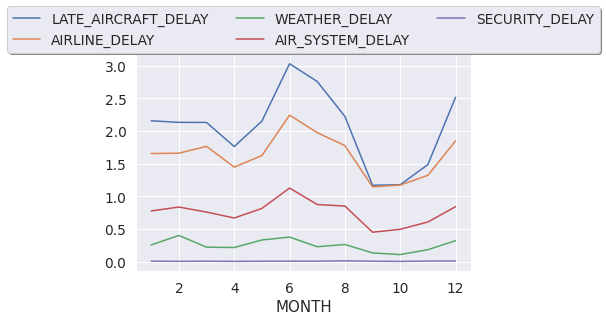

In [74]:
df1 = departuredelay_flights.filter(['MONTH','AIRLINE_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1)
df1 = df1.groupby('MONTH')['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY'].sum().plot()
df1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

<BarContainer object of 2 artists>

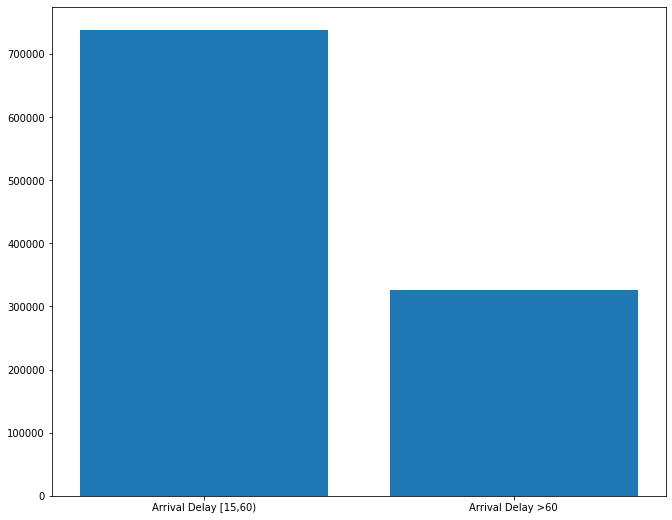

In [39]:
delayed_flights = flights[(flights.Status>=1) & (flights.Status<3)]
amount_delayed = delayed_flights.groupby('Status').count()
height = ['Arrival Delay [15,60)','Arrival Delay >60']
plt.figure(figsize = (11,9))
plt.bar(height, amount_delayed['MONTH'])


Text(0.5, 1.0, 'Avg Arrival Delay per Month')

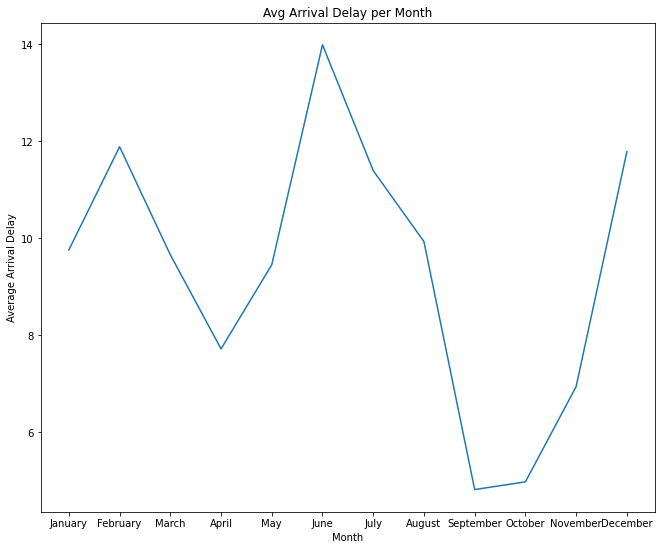

In [40]:
arrival = delayed_flights.groupby("MONTH").mean()
arrival_delay = arrival.ARRIVAL_DELAY
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(11,9))
plt.plot(months,departure_delay)
plt.ylabel('Average Arrival Delay')
plt.xlabel('Month')
plt.title("Avg Arrival Delay per Month")

Text(0.5, 0, 'Airline')

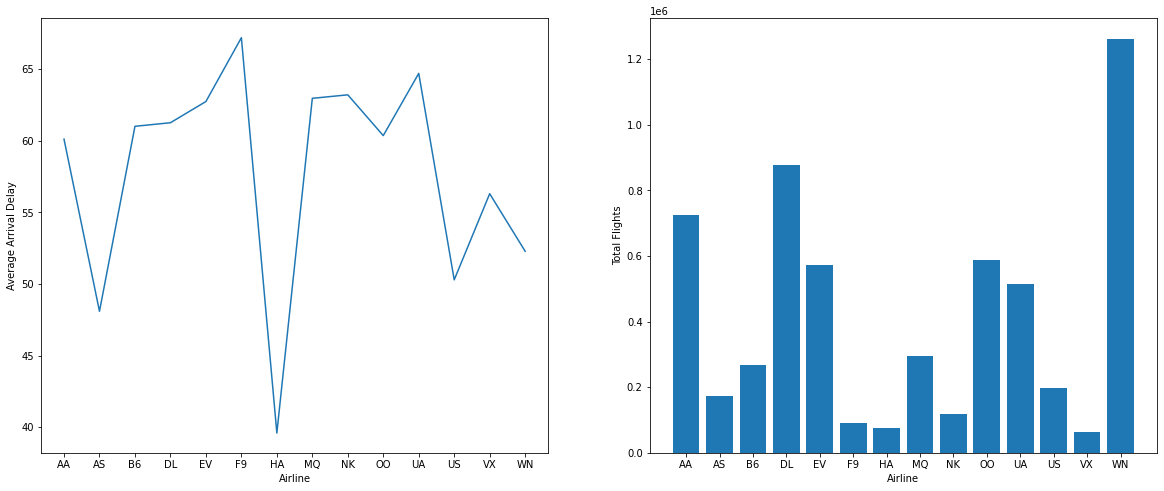

In [45]:
arrival_company = delayed_flights.groupby("AIRLINE").mean()
delayarrival_company = arrival_company.ARRIVAL_DELAY
f,ax = plt.subplots(1,2, figsize=(20,8))
ax[0].plot(names,delayarrival_company)
ax[0].set_ylabel('Average Arrival Delay')
ax[0].set_xlabel('Airline')

totalflights_airlines = flights.groupby('AIRLINE').count()
values = totalflights_airlines['MONTH']
ax[1].bar(names,values)
ax[1].set_ylabel("Total Flights")
ax[1].set_xlabel('Airline')

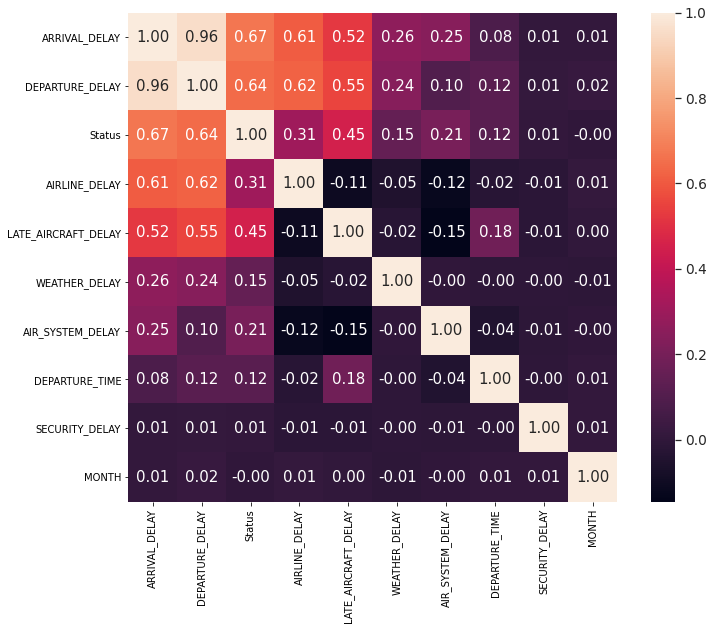

In [47]:
delcorrmat = delayed_flights.corr()

k = 10 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 9))
cols = delcorrmat.nlargest(k, 'ARRIVAL_DELAY')['ARRIVAL_DELAY'].index
cm = np.corrcoef(delayed_flights[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


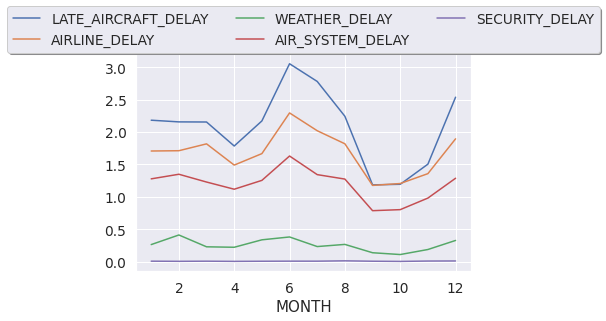

In [49]:
df2 = delayed_flights.filter(['MONTH','AIRLINE_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY'], axis=1)
df2 = df2.groupby('MONTH')['LATE_AIRCRAFT_DELAY','AIRLINE_DELAY','WEATHER_DELAY','AIR_SYSTEM_DELAY','SECURITY_DELAY'].sum().plot()
df2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=3, fancybox=True, shadow=True)
plt.show()

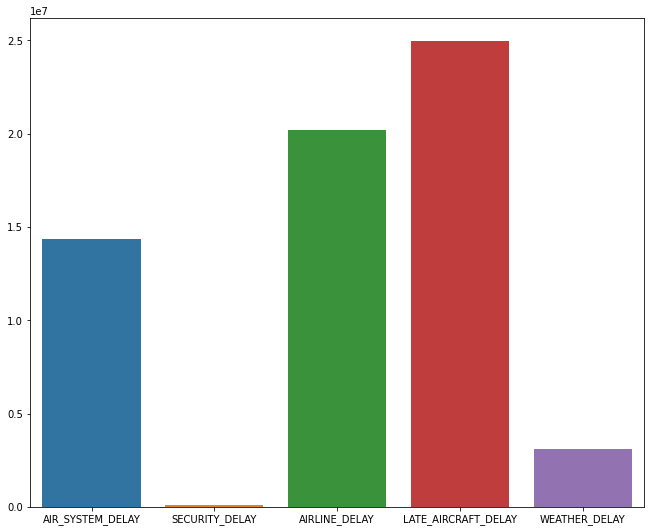

In [21]:
total_air_system_delay = flights['AIR_SYSTEM_DELAY'].sum()
total_security_delay = flights['SECURITY_DELAY'].sum()
total_airline_delay = flights['AIRLINE_DELAY'].sum()
total_late_aircraft_delay = flights['LATE_AIRCRAFT_DELAY'].sum()
total_weather_delay = flights['WEATHER_DELAY'].sum()
values = [total_air_system_delay, total_security_delay, total_airline_delay, 
          total_late_aircraft_delay, total_weather_delay]
delays = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY' ]
f, ax = plt.subplots(figsize = (11,9))
sns.barplot(delays, values)
plt.show()

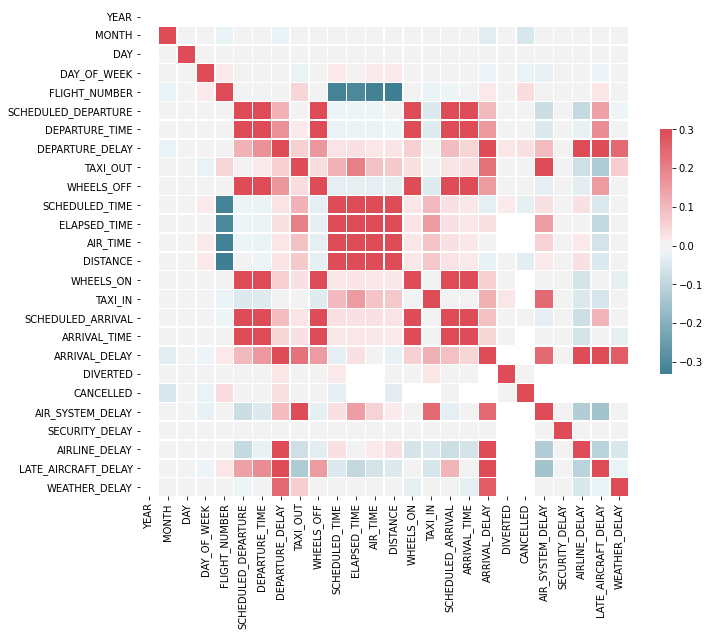

In [29]:
#correlation matrix
corr_matrix = flights.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [29]:
flights.loc[flights["CancellationCode"] == "A","CancellationCode"] = 1
flights.loc[flights["CancellationCode"] == "B","CancellationCode"] = 2
flights.loc[flights["CancellationCode"] == "C","CancellationCode"] = 3


for rows in flights:
  flights.loc[flights["ArrDelay"] <= 15,"Status"] = 0
  flights.loc[flights["ArrDelay"] >= 15,"Status"] = 1     #Moderate Delay
  flights.loc[flights['ArrDelay'] >= 60, 'Status'] = 2    #High Delay
  flights.loc[flights['Diverted'] == 1, 'Status'] = 3     #Diverted
  flights.loc[flights['Cancelled'] == 1, 'Status'] = 4    #Cancelled


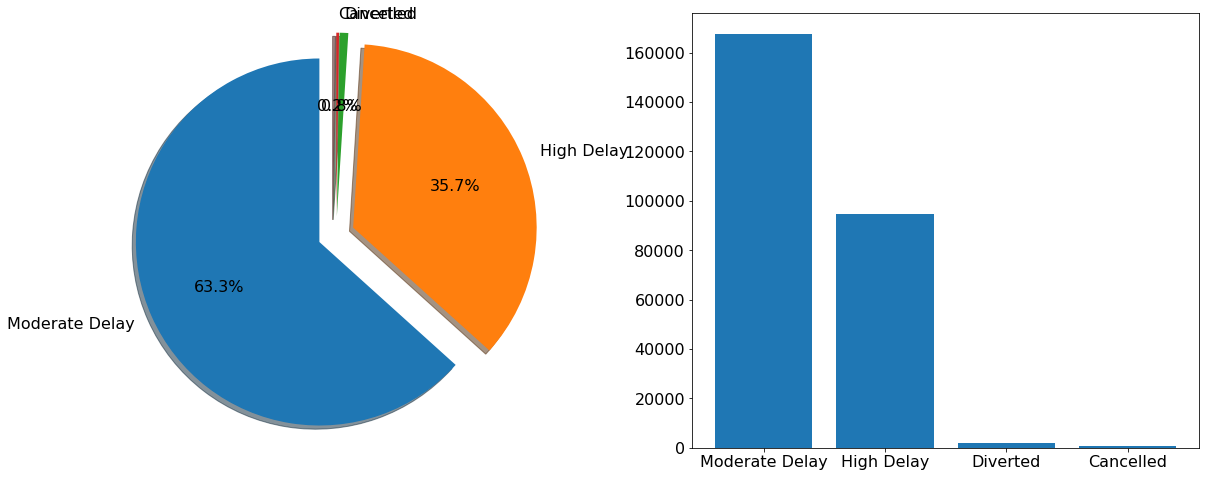

In [30]:
mod_delay = flights[(flights.Status == 1)].count()
high_delay = flights[(flights.Status ==2)].count()
diverted = flights[(flights.Status == 3)].count()
cancelled = flights[(flights.Status ==4)].count()

values = [mod_delay[0], high_delay[0], diverted[0], cancelled[0]]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Moderate Delay', 'High Delay', 'Diverted', 'Cancelled'
explode = (0.1, 0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(1,2, figsize=(20,8))
ax1[0].pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1[1].bar(labels, values)
plt.show()

Text(0, 0.5, 'Number of Flights Cancelled')

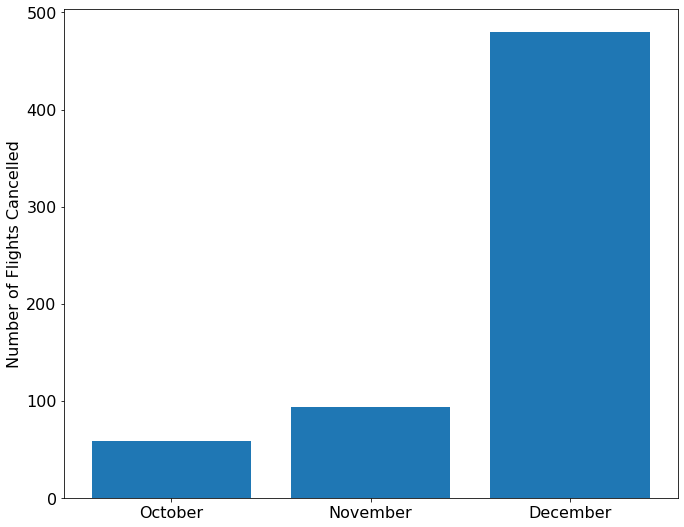

In [36]:
font = {'size'   : 16}
plt.rc('font', **font)

cancelled_flights_month = flights[(flights.Cancelled == 1)].groupby("Month").count()
columns = list(range(1,30))
cancelled_flights_month.rename(columns={'Unnamed: 0':'CancelledFlights'}, inplace=True)
cancelled_flights_month.drop(cancelled_flights_month.columns[columns], axis = 1)
month = ['October','November','December']

f, ax = plt.subplots(figsize = (11,9))
ax.bar(month, cancelled_flights_month["CancelledFlights"])
ax.set_ylabel('Number of Flights Cancelled')


Text(0, 0.5, 'Number of Flights Cancelled')

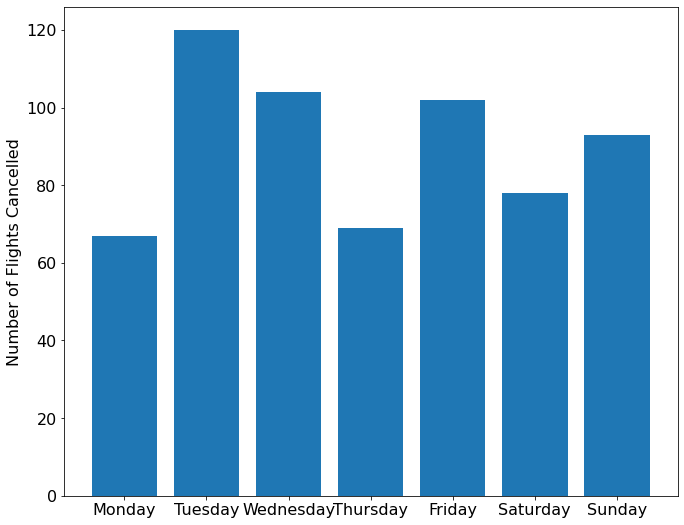

In [28]:
font = {'size'   : 16}
plt.rc('font', **font)

cancelled_flights = flights[(flights.Cancelled == 1)].groupby("DayOfWeek").count()
columns = list(range(1,30))
cancelled_flights.rename(columns={'Unnamed: 0':'CancelledFlights'}, inplace=True)
cancelled_flights.drop(cancelled_flights.columns[columns], axis = 1)
week_days = ['Monday','Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']

f, ax = plt.subplots(figsize = (11,9))
ax.bar(week_days, cancelled_flights["CancelledFlights"])
ax.set_ylabel('Number of Flights Cancelled')

In [94]:
np.unique(flights.CancellationCode)


array(['A', 'B', 'C', 'N'], dtype=object)